In [24]:
# Import SpreadSheet from Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Part 0: Import Packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Step One: Inital EDA With Pandas**


*   Load your Dataset
*   Display the first few rows
*   Provide Descriptive Statistics (mean, median, mode, variance, stdev)
*   Identify and handle missing values
*   Check for duplicates and remove them if nessecary


In [27]:
df = pd.read_csv('/content/drive/My Drive/reference_dataset_for_beats_externship.csv')
df.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [28]:
# Calculate the Mean, Median, and Mode for the 'ratings' column
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]

# Print the results
print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Mode rating:", mode_rating)

Mean rating: 4.291203235591507
Median rating: 5.0
Mode rating: 5


In [29]:
# Variance and Standard Deviation
variance = df['rating'].var()
std_dev = df['rating'].std()

print("Variance:", variance)
print("Standard Deviation:", std_dev)

Variance: 1.1328210640671987
Standard Deviation: 1.0643406710575325


In [42]:
asins = [
    "B09PYVXXW5", "B09H27SXHS", "B09FM6PDHP", "B09HN594TL", "B096SV8SJG",
    "B0BTZKP1TP", "B08ZR5JB9G", "B0C2F5KD26", "B0BYPFNW6T", "B093SLWMS7",
    "B0CXL4FQBK", "B099TJGJ91", "B0D4SX9RC6", "B08X4YMTPM", "B0B44F1GGK",
    "B0BG93TZ5N", "B09XXW54QG", "B07DD3WBYW", "B07YBN9XXG", "B0CY6S748H",
    "B01IOD7KB6", "B0CVFM97GD", "B08NLCW9WY", "B08YRT9T38", "B08VL5S148",
    "B097XX34SL", "B07PXGQC1Q", "B0BZ9WMLNQ", "B0D3JB14QS", "B0BQPNMXQV",
    "B0C1QWWZR4", "B09CKF166Y", "B0CF7GYNW2", "B09CFP6J6D", "B0BZTCXG6T",
    "B0863H1JKB", "B09JL41N9C", "B09V9P5Q6W", "B0BZK2Z2TC", "B0C345M3T7",
    "B0CD2FSRDD", "B0CPFV77W4", "B0B1NGPY94", "B0BYSQDWRT", "B0B2SH4CN6",
    "B09D1HMBQ3", "B0D4STD5ZC", "B099TLMRB6", "B07GWRCZQP", "B09GK5JMHK",
    "B088KRKFJ3", "B08Z1RP9K8", "B0B445JCZ3", "B0B43Y8GHZ"
]

product_names = [
    "1MORE ComfoBuds Mini", "HTC Wireless Headphones", "JBL Tune 230NC TWS", "JLab Go Air Pop",
    "Beats Studio Buds", "Jabra Elite 4", "Sennheiser CX True Wireless", "Skullcandy Smokin' Buds",
    "Sony WF-C700N", "Soundcore Life P3", "Sony ULT Field 1", "Bose SoundLink Flex",
    "Beats Pill", "JBL CHARGE 5", "Sony SRS-XE200", "Tronsmart Bang SE", "Marshall Emberton II",
    "Ultimate Ears Boom 3", "Bose Soundlink Mini II", "Roam 2", "House of Marley Get Together",
    "Ultimate Ears MEGABOOM 4", "JBL Xtreme 3", "Bang & Olufsen Beosound Explore",
    "Bose SoundLink Revolve+ II", "Monster S320", "Apple AirPods 2nd Generation", "Google Pixel Buds A-Series",
    "JBL Vibe Beam", "JBL Tune Buds", "SAMSUNG Galaxy Buds2", "SAMSUNG Galaxy Buds FE", "Sony WF-C500",
    "Panasonic ErgoFit", "Panasonic True Wireless", "Beats Fit Pro", "JBL Live Pro TWS 2",
    "Beats Studio Buds +", "Sony WF-1000XM5", "Bose QuietComfort Ultra", "Bose Ultra Open Earbuds",
    "Google Pixel Buds Pro", "SHOKZ OpenFit", "SAMSUNG Galaxy Buds2 Pro", "Jabra Elite 7 Pro",
    "Beats Pill Pro", "Bose SoundLink Flex", "JBL Charge 4", "JBL Flip 6", "Marshall Stockwell II",
    "Sonos Roam", "Sony SRS-XE300", "Sony SRS-XG300"
]

product_dict = dict(zip(asins, product_names))
df.rename(columns={'Unnamed: 0': 'product_name'}, inplace=True)
df['product_name'] = df['product_id'].map(product_dict)
df.head()

,product_name,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,1MORE ComfoBuds Mini,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1MORE ComfoBuds Mini,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,1MORE ComfoBuds Mini,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,1MORE ComfoBuds Mini,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,1MORE ComfoBuds Mini,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [57]:
# Identify and Handle Missing Values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values
df = df.dropna()

product_name          0
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64


# **Part Two: Data Visualization**
*   Create Various Plots (historgrams, box plots, scatter plots, heatmaps) to visaulize the data distribution and relationships
*   Use Matplotlib and Seaborn for creating these visualizations

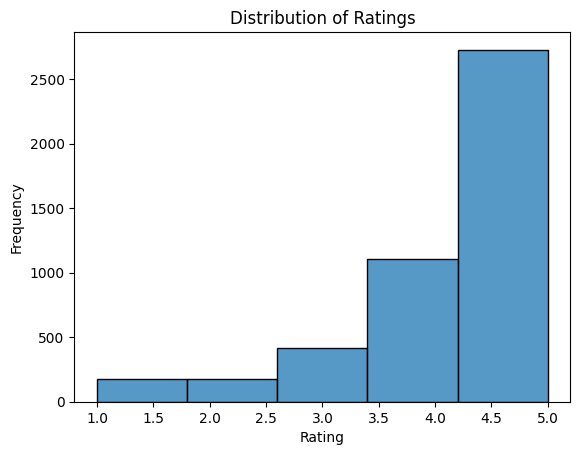




rating
5    59.184559
4    23.964433
3     9.043591
1     3.903709
2     3.903709
Name: proportion, dtype: float64


In [58]:
# Visualize Ratings Distribution
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

print('\n\n')

# View Percentages
print(df['rating'].value_counts(normalize=True) * 100)

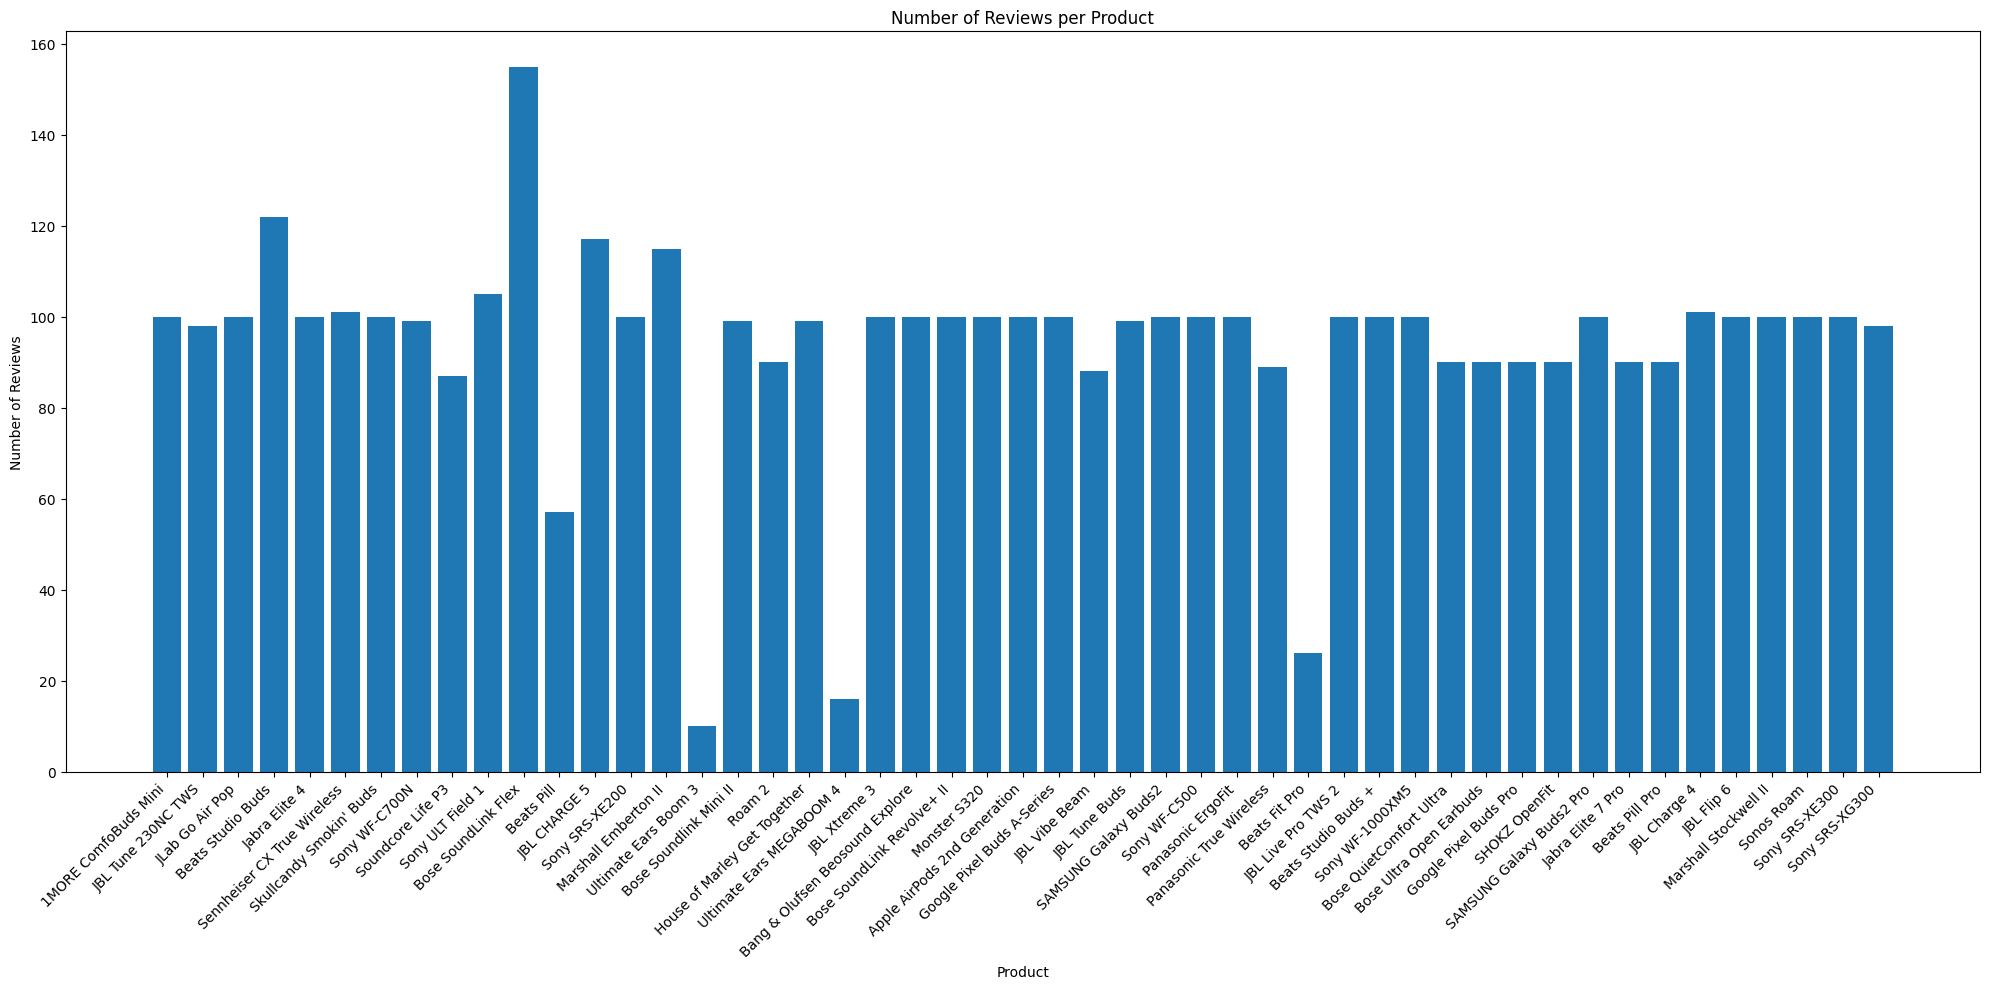

In [66]:
# Visualize Categories
products = df['product_name'].unique()
num_products = []
for product in products:
  num_products.append(df[df['product_name'] == product].shape[0])

plt.figure(figsize=(20, 10))
plt.bar(products, num_products)
plt.title('Number of Reviews per Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

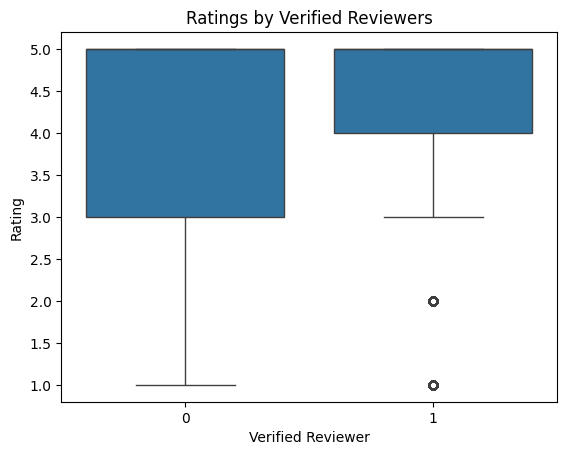

In [67]:
# Analyze the Correlation between Verified Reviewers and Ratings
sns.boxplot(x = 'is_verified', y = 'rating', data = df)
plt.title('Ratings by Verified Reviewers')
plt.xlabel('Verified Reviewer')
plt.ylabel('Rating')
plt.show()

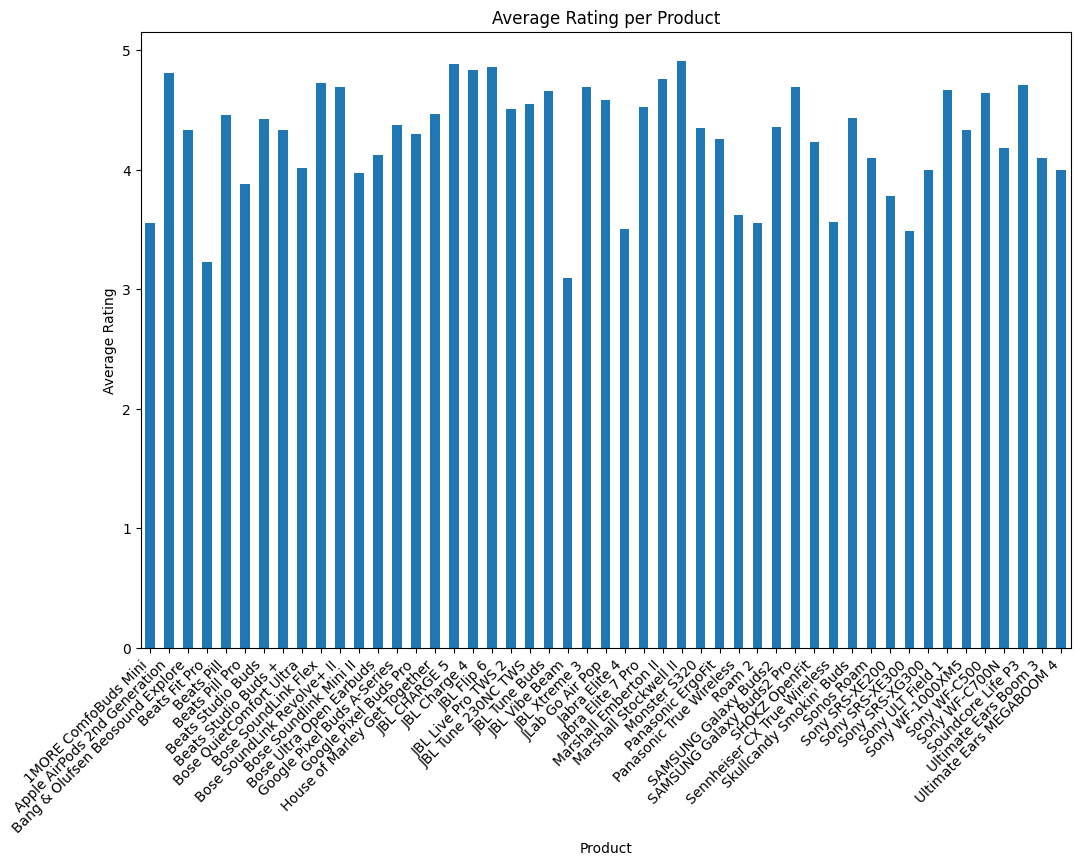

In [68]:
# Average Ratings / Product
avg_ratings = df.groupby('product_name')['rating'].mean()
avg_ratings.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.title('Average Rating per Product')
plt.xticks(rotation=45, ha="right")
plt.show()

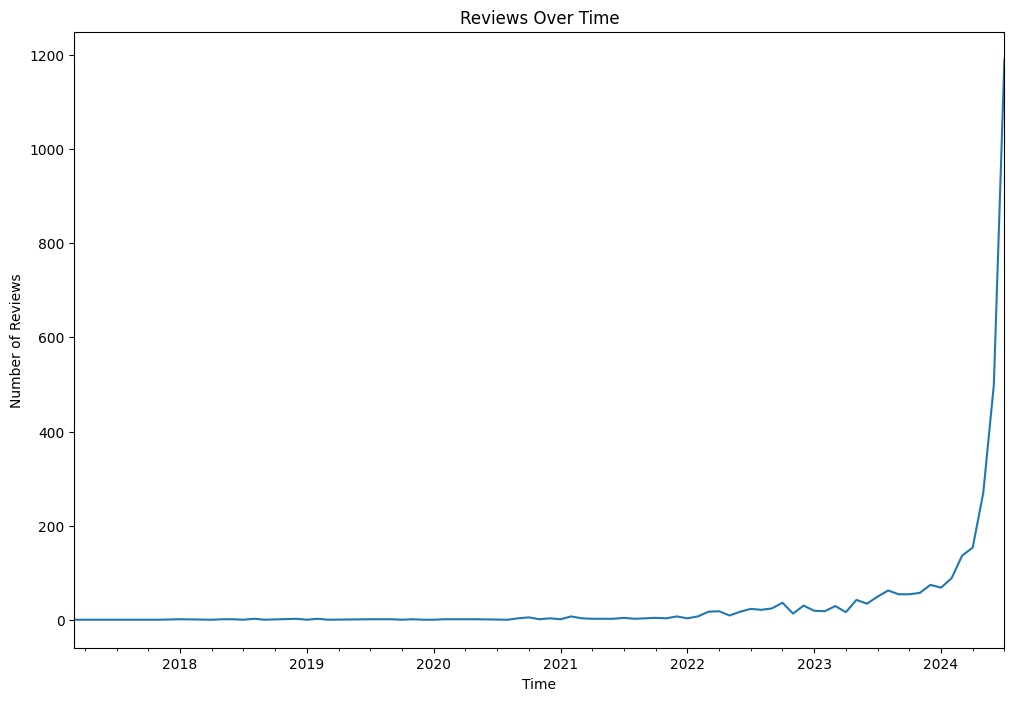

In [71]:
# Extract date from the timestamp string
df['timestamp'] = df['timestamp'].str.extract(r'(\w+\s\d{2},\s\d{4})')

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

reviews_over_time = df.groupby(df['timestamp'].dt.to_period('M')).size()
reviews_over_time.plot(kind='line', figsize=(12, 8))
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Reviews Over Time')
plt.show()

# **Part Three: Correlation Analysis**
*   Calculate the correlation Matrix
*   Visualize the correlation matrix using a heatmap
*   Interpret the results to understand the relationships between variables

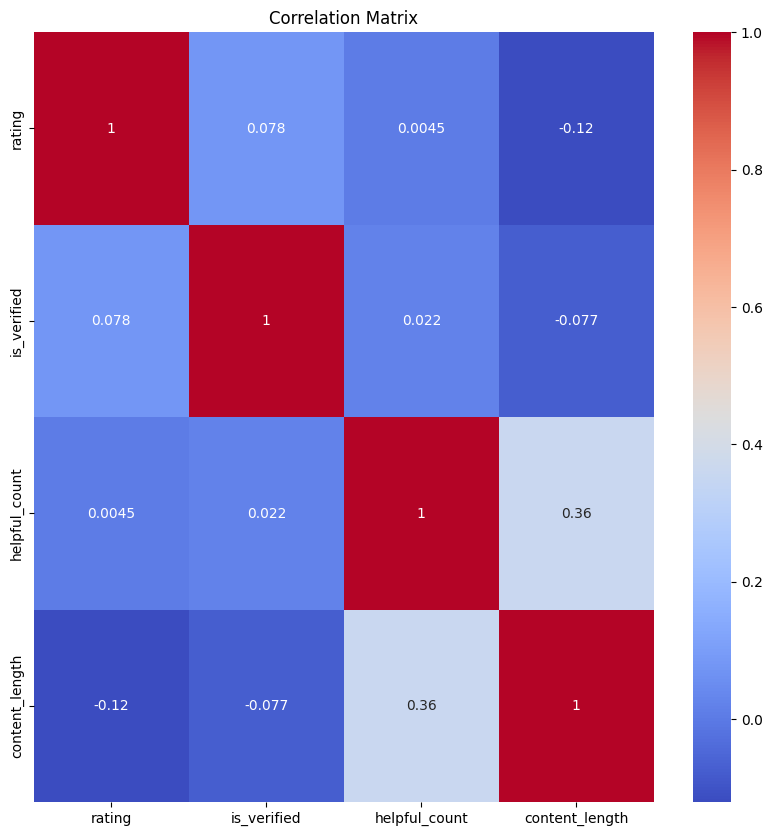

In [77]:
# Calculate Correlation Matrix
corr_df = df.select_dtypes(include=[np.number])
corr = corr_df.corr()

# Visualize the Correlation Matrix
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

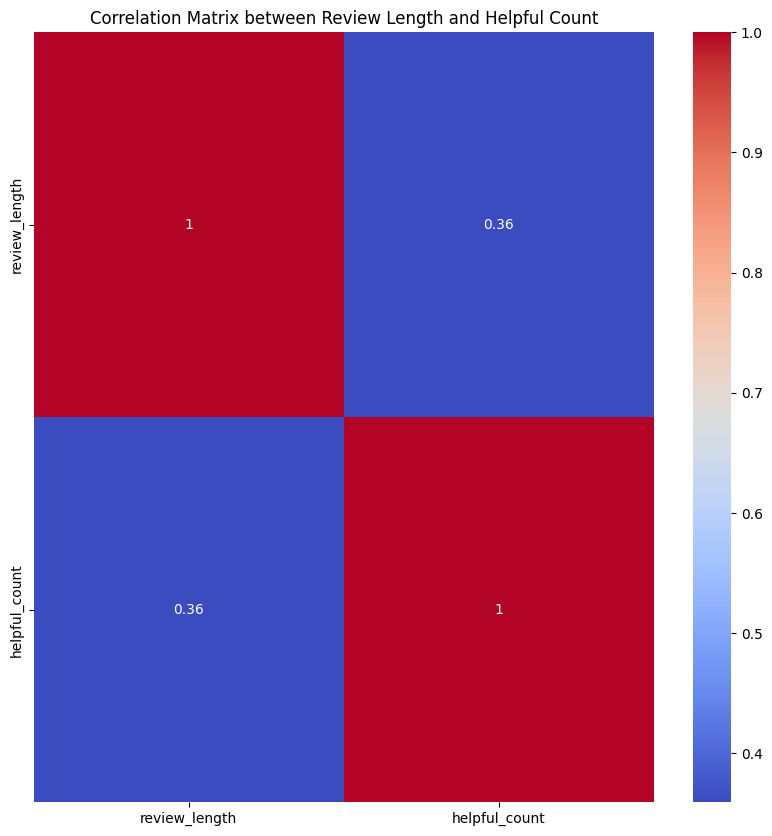

In [79]:
# Get Review Length
df['review_length'] = df['content'].apply(lambda x: len(str(x)))

# Compute Correlation Matrix between Review Length and Helpful Count
corr_matrix = df[['review_length', 'helpful_count']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Review Length and Helpful Count')
plt.show()

# **Part Four: Sentiment Analysis With TextBlob**
*   Perform sentiment analysis on the text reviews
*   Classify the reviews into positive, negative, and neutral sentiments
*   Aggregate the sentiment scores to assess overall consumer sentiment

In [84]:
# Perform Sentiment Analysis on Entire Datset
from textblob import TextBlob

review_text = df['content']
sentiment_scores = []
subjectivity_scores = []

for review in review_text:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)
    subjectivity_scores.append(blob.sentiment.subjectivity)

sentiment_scores = np.array(sentiment_scores)
subjectivity_scores = np.array(subjectivity_scores)
print("Overall Sentiment for entire Dataset: ", np.mean(sentiment_scores))
print("Overall Subjectivity for entire Dataset: ", np.mean(subjectivity_scores))

Overall Sentiment for entire Dataset:  0.2716074995816015
Overall Subjectivity for entire Dataset:  0.5243644831536504


In [82]:
# Perform Sentiment Analysis for Beats Products Only
beats_reviews = df[df['product_name'].str.contains('Beats', case=False, na=False)]
review_text_beats = beats_reviews['content']
sentiment_scores_beats = []
subjectivity_scores_beats = []

for review in review_text_beats:
    blob = TextBlob(review)
    sentiment_scores_beats.append(blob.sentiment.polarity)
    subjectivity_scores_beats.append(blob.sentiment.subjectivity)

sentiment_scores_beats = np.array(sentiment_scores_beats)
subjectivity_scores_beats = np.array(subjectivity_scores_beats)
print("Overall Sentiment for Beats: ", np.mean(sentiment_scores_beats))
print("Overall Subjectivity for Beats: ", np.mean(subjectivity_scores_beats))

Overall Sentiment for Beats:  0.25634708278432133
Overall Subjectivity for Beats:  0.5256438009843449


In [85]:
# Perform Sentiment Analysis on Non-Beats Products
non_beats_reviews = df[~df['product_name'].str.contains('Beats', case=False, na=False)]
review_text_non_beats = non_beats_reviews['content']
sentiment_scores_non_beats = []
subjectivity_scores_non_beats = []

for review in review_text_non_beats:
    blob = TextBlob(review)
    sentiment_scores_non_beats.append(blob.sentiment.polarity)
    subjectivity_scores_non_beats.append(blob.sentiment.subjectivity)

sentiment_scores_non_beats = np.array(sentiment_scores_non_beats)
subjectivity_scores_non_beats = np.array(subjectivity_scores_non_beats)
print("Overall Sentiment for Non-Beats: ", np.mean(sentiment_scores_non_beats))
print("Overall Subjectivity for Non-Beats: ", np.mean(subjectivity_scores_beats))

Overall Sentiment for Non-Beats:  0.2730372587454833
Overall Subjectivity for Non-Beats:  0.5256438009843449


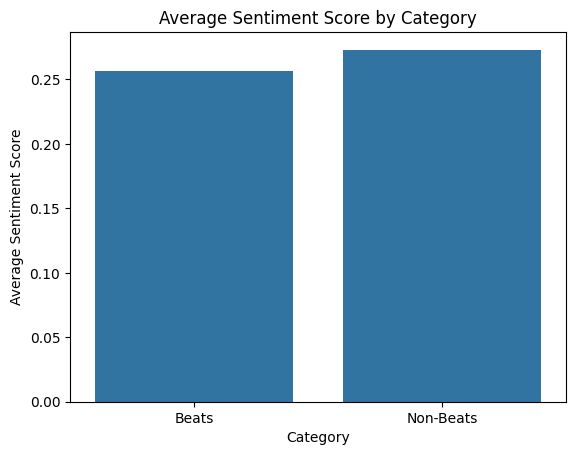

In [86]:
# Visualize Sentiment Scores
sns.barplot(x=['Beats', 'Non-Beats'], y=[np.mean(sentiment_scores_beats), np.mean(sentiment_scores_non_beats)])
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Category')
plt.show()

# **Part Five: Findings/Conclusion**

Based on the analysis, the headphone/earbuds/speaker market sentiment is generally positive, with over 80% of all reviews rating the products 4 stars or higher. This indicates strong customer satisfaction across the board.

Further sentiment analysis of review content supports this, revealing that the overall sentiment is fairly positive for the market as a whole. However, Beats By Dre products score slightly below their competitors in terms of overall sentiment.

While Beats By Dre maintains a positive sentiment, this slight underperformance suggests there may be specific areas where the brand could improve to better meet or exceed customer expectations. Further analysis could focus on identifying these areas by examining negative reviews, common themes, or specific aspects of the product experience where competitors are excelling. This targeted approach could provide actionable insights to help Beats By Dre enhance customer satisfaction and potentially outperform the market.

*I believe we should look over sentiment over time next.*

# **Part Six: Complete Functions**

In [97]:
# Calculate Correlation:
# Write a function to calculate the correlation between two variables in a dataset.
def calculate_correlation(df, col1, col2):
  corr_df = df[[col1, col2]]
  corr = corr_df.corr()
  return corr

# Test
cor = calculate_correlation(df, 'rating', 'helpful_count')
print(cor)

                 rating  helpful_count
rating         1.000000       0.004477
helpful_count  0.004477       1.000000


In [98]:
# Calculate Skewness and Kurtosis:
# Write a function to calculate the skewness and kurtosis of a variable in a dataset.
def calculate_skewness_kurtosis(df, col):
  skewness = df[col].skew()
  kurtosis = df[col].kurtosis()
  return skewness, kurtosis

# Test
skewness, kurtosis = calculate_skewness_kurtosis(df, 'rating')
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: -1.6568762075572525
Kurtosis: 2.1412617307015016


In [99]:
# Sentiment Analysis Summary:
# Write a function to perform sentiment analysis on a
# dataset of text reviews and return the counts of positive, negative, and neutral reviews.

def sentiment_analysis_summary(df):
  review_text = df['content']
  sentiment_scores = []
  subjectivity_scores = []

  for review in review_text:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)
    subjectivity_scores.append(blob.sentiment.subjectivity)

  sentiment_scores = np.array(sentiment_scores)
  subjectivity_scores = np.array(subjectivity_scores)

  positive_count = np.sum(sentiment_scores > 0)
  negative_count = np.sum(sentiment_scores < 0)
  neutral_count = np.sum(sentiment_scores == 0)

  return sentiment_scores, subjectivity_scores, positive_count, negative_count, neutral_count

# Test
sentiment_scores, subjectivity_scores, positive_count, negative_count, neutral_count = sentiment_analysis_summary(df)

print("Overall Sentiment for entire Dataset: ", np.mean(sentiment_scores))
print("Overall Subjectivity for entire Dataset: ", np.mean(subjectivity_scores))
print("Positive reviews:", positive_count)
print("Negative reviews:", negative_count)
print("Neutral reviews:", neutral_count)

Overall Sentiment for entire Dataset:  0.2716074995816015
Overall Subjectivity for entire Dataset:  0.5243644831536504
Positive reviews: 4093
Negative reviews: 207
Neutral reviews: 311
